In [43]:
from base.pairwise_registration import pairwise_registration
import numpy as np
import matplotlib.pyplot as plt

In [44]:
source = np.loadtxt("sample_data/georef/MarkovSpodmol_ScanTargets.txt", 
                    skiprows=1, usecols=[1,2,3], delimiter=",")
target = np.loadtxt("sample_data/georef/MarkovSpodmol_StationCoords.txt",
                    skiprows=1, usecols=[1,2,3], delimiter=",")

names = np.loadtxt("sample_data/georef/MarkovSpodmol_StationCoords.txt",
                    skiprows=1, usecols=[0], delimiter=",", dtype=str)

In [26]:
result = pairwise_registration(source, target, atol=0.3)

mean residual errors are within tolerance of 0.3!


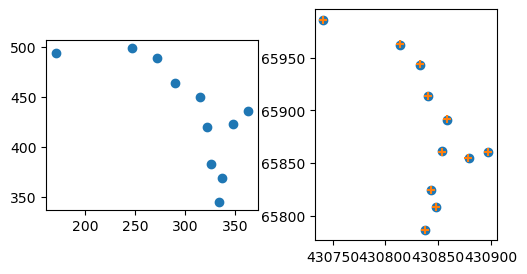

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].scatter(*source[:,[0,1]].T)
axes[1].scatter(*target[:,[0,1]].T)
axes[1].scatter(*result["P1_prime"][[0,1]], marker="+")

for ax in axes:
    ax.set_aspect("equal")

The residual error in x, y, z after the rigid transformation are the following:

In [28]:
residuals = result["P1_prime"].T -target

The root mean square error after registration of the source points to the targets is the following

In [34]:
np.sqrt(np.mean(np.linalg.norm(residuals, axis=1)**2))

0.3119989594233872

The translation corresponds broadly to shifting the point cloud to its geographic coordinates:

In [35]:
result["T"]

array([[430398.61566872],
       [ 65590.75236516],
       [   554.33041506]])

The rotation matrix on the other hand is the following: 

In [36]:
result["R"]

array([[ 9.28419460e-01,  3.71533673e-01,  1.89200265e-04],
       [-3.71533375e-01,  9.28417776e-01,  1.83960890e-03],
       [ 5.07819763e-04, -1.77822291e-03,  9.99998290e-01]])

Here we can see that the rotation matrix has the approximate form of: 

$\begin{bmatrix}  cos(\theta)& -sin(\theta)&0 \\ sin(\theta)& cos(\theta)&0 \\ 0&0&1 \\ \end{bmatrix}$

In [42]:
print(f"Rotation matrix corresponds to a simple counterclockwise rotation of {np.rad2deg(np.cos(0.92842)):.0f} degrees")

Rotation matrix corresponds to a simple counterclockwise rotation of 34 degrees


This corresponds to a 34° counter clockwise rotation around a vertical axis, which is what we expected from a scan where the horizontal inclination is well controlled. 